In [1]:
import akshare as ak

index_us_stock_sina_df = ak.index_us_stock_sina(symbol=".IXIC")
index_us_stock_sina_df.to_csv("data/index_us_stock_sina.IXIC.csv", index=False)

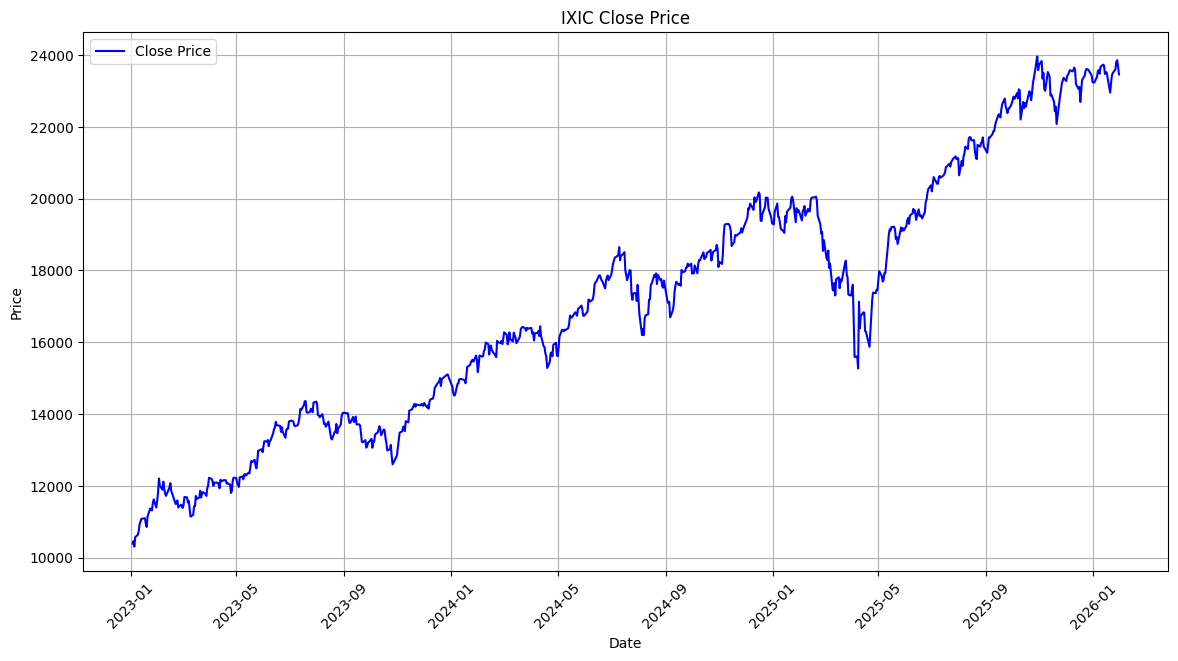

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/index_us_stock_sina.IXIC.csv")
data["date"] = pd.to_datetime(data["date"])
data = data[data['date'] >= pd.to_datetime("2023-01-01")]

plt.figure(figsize=(14, 7))
plt.plot(data["date"], data["close"], label="Close Price", color='blue')
plt.title("IXIC Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.savefig("output/ndx_close_price.png", dpi=300)
plt.show()

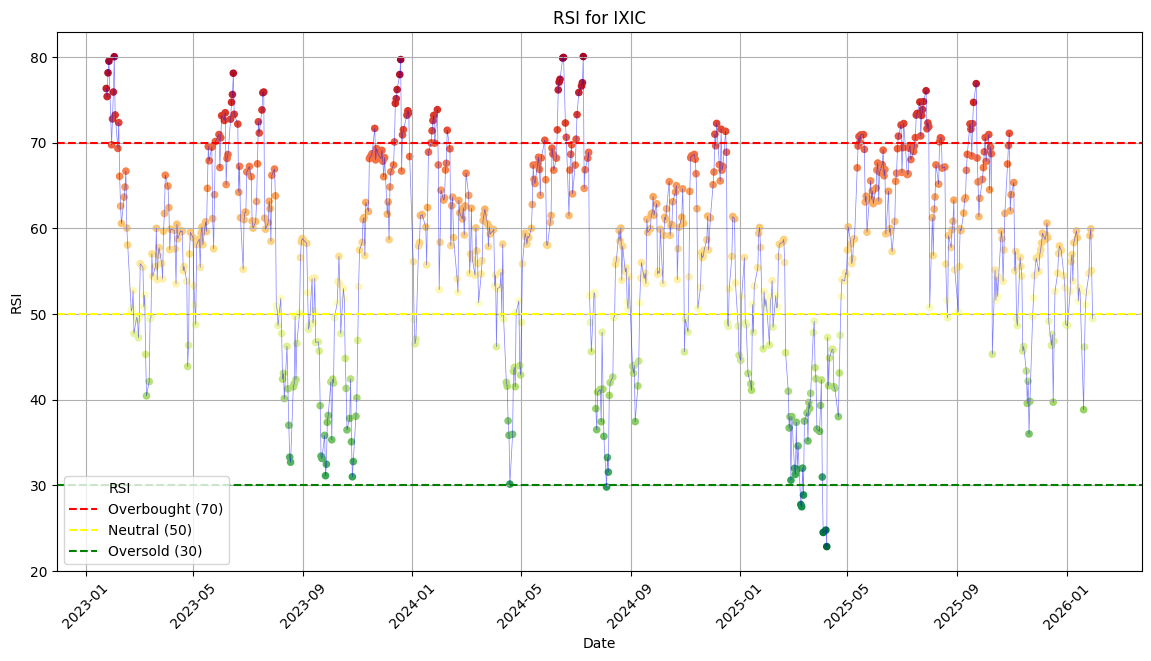

In [3]:
from src.calculate_rsi import calculate_rsi

data["rsi"] = calculate_rsi(data["close"].tolist(), window=14)

plt.figure(figsize=(14, 7))
scatter = plt.scatter(data["date"], data["rsi"], c=data["rsi"], cmap='RdYlGn_r', s=20, label="RSI")
plt.plot(data["date"], data["rsi"], color='blue', alpha=0.5, linewidth=0.5)
# plt.colorbar(scatter, label='RSI Value')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(50, color='yellow', linestyle='--', label='Neutral (50)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("RSI for IXIC")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.savefig("output/ndx_rsi.png", dpi=300)
plt.show()